In [1]:
import tensorflow as tf
from cnnmodel import CNNModel

In [2]:
# Open Model
cnnmodel = CNNModel(modelname="classification", filename="simple_arg.h5", modelkind='simple', image_argumentation=True)
# classification_model = CNNModel(modelname="classification", filename="simple_noarg.h5", modelkind='simple', image_argumentation=False)
# grading_model = CNNModel(modelname="grade", filename="simple_noarg.h5", modelkind='simple', image_argumentation=False)

Found 20491 images belonging to 6 classes.
Found 5122 images belonging to 6 classes.
Loading model from file


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 512, 512, 3)]     0         
                                                                 
 conv2d_6 (Conv2D)           (None, 510, 510, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 255, 255, 16)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 253, 253, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 126, 126, 32)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 124, 124, 64)      1849

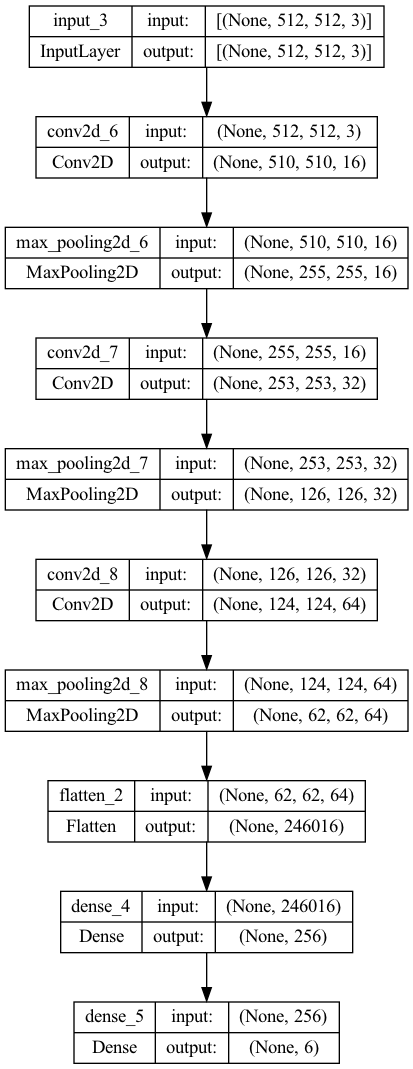

In [3]:
cnnmodel.model.summary()
tf.keras.utils.plot_model(cnnmodel.model, show_shapes=True, show_layer_names=True)

In [17]:
# history = cnnmodel.train(epochs=50, callback_patience=20)
# print(history)

Epoch 1/50


/Users/gana-pt6678/anaconda3/envs/cancerdiagnosis/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


641/641 [==============================] - 964s 2s/step - loss: 0.7792 - accuracy: 0.7487 - val_loss: 0.3352 - val_accuracy: 0.8795
Epoch 2/50
641/641 [==============================] - 958s 1s/step - loss: 0.3423 - accuracy: 0.8766 - val_loss: 0.2829 - val_accuracy: 0.9018
Epoch 3/50
641/641 [==============================] - 950s 1s/step - loss: 0.2506 - accuracy: 0.9156 - val_loss: 0.1664 - val_accuracy: 0.9432
Epoch 4/50
641/641 [==============================] - 928s 1s/step - loss: 0.1816 - accuracy: 0.9409 - val_loss: 0.2687 - val_accuracy: 0.9061
Epoch 5/50
641/641 [==============================] - 936s 1s/step - loss: 0.1433 - accuracy: 0.9515 - val_loss: 0.2811 - val_accuracy: 0.9143
Epoch 6/50
641/641 [==============================] - 915s 1s/step - loss: 0.1221 - accuracy: 0.9625 - val_loss: 0.1177 - val_accuracy: 0.9621
Epoch 7/50
641/641 [==============================] - 929s 1s/step - loss: 0.1175 - accuracy: 0.9625 - val_loss: 0.0577 - val_accuracy: 0.9785
Epoch 8/50

In [4]:
print("Evaluating model:")
print(cnnmodel.model.evaluate(cnnmodel.validation_generator))

Evaluating model:


/Users/gana-pt6678/anaconda3/envs/cancerdiagnosis/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


161/161 [==============================] - 184s 1s/step - loss: 0.0598 - accuracy: 0.9795
[0.059768062084913254, 0.9795001745223999]


In [ ]:
# # Print Number of test instances, Trained Images, Tested Images, Cancer Event Cells, Non Cancer Event Cells, Correctly detected, Specificity, Accuracy, Recall, Precision, F-measure
# print("Number of test instances: ", len(cnnmodel.validation_generator))
# print("Trained Images: ", len(cnnmodel.train_generator))
# print("Tested Images: ", len(cnnmodel.validation_generator))
# print("Cancer Event Cells: ", cnnmodel.validation_generator.classes.sum())
# print("Non Cancer Event Cells: ", len(cnnmodel.validation_generator.classes) - cnnmodel.validation_generator.classes.sum())
# print("Correctly detected: ", cnnmodel.validation_generator.classes.sum() - (cnnmodel.validation_generator.classes - cnnmodel.predictions).sum())
# print("Specificity: ", (cnnmodel.validation_generator.classes - cnnmodel.predictions).sum() / (len(cnnmodel.validation_generator.classes) - cnnmodel.validation_generator.classes.sum()))
# print("Accuracy: ", (cnnmodel.validation_generator.classes.sum() - (cnnmodel.validation_generator.classes - cnnmodel.predictions).sum()) / len(cnnmodel.validation_generator.classes))
# print("Recall: ", (cnnmodel.validation_generator.classes.sum() - (cnnmodel.validation_generator.classes - cnnmodel.predictions).sum()) / cnnmodel.validation_generator.classes.sum())
# print("Precision: ", (cnnmodel.validation_generator.classes.sum() - (cnnmodel.validation_generator.classes - cnnmodel.predictions).sum()) / cnnmodel.predictions.sum())
# print("F-measure: ", 2 * ((cnnmodel.validation_generator.classes.sum() - (cnnmodel.validation_generator.classes - cnnmodel.predictions).sum()) / cnnmodel.validation_generator.classes.sum()) * ((cnnmodel.validation_generator.classes.sum() - (cnnmodel.validation_generator.classes - cnnmodel.predictions).sum()) / cnnmodel.predictions.sum()) / ((cnnmodel.validation_generator.classes.sum() - (cnnmodel.validation_generator.classes - cnnmodel.predictions).sum()) / cnnmodel.validation_generator.classes.sum() + ((cnnmodel.validation_generator.classes.sum() - (cnnmodel.validation_generator.classes - cnnmodel.predictions).sum()) / cnnmodel.predictions.sum())))

Number of test instances:  6
Trained Images:  25
Tested Images:  6
Cancer Event Cells:  308
Non Cancer Event Cells:  -118


AttributeError: 'CNNModel' object has no attribute 'predictions'

In [ ]:
cnnmodel.save(filename=None)

AttributeError: 'CNNModel' object has no attribute 'history'

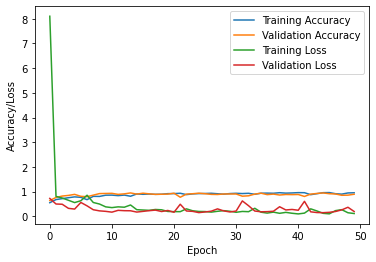

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt


if not history:
    history = cnnmodel.history
    
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy/Loss')
plt.legend()
plt.show()
plt.savefig(cnnmodel.filename + "_history.png")

In [ ]:
# classification_model, grading_model = None, None
# classification_model = cnnmodel
# classification_model = CNNModel(modelname="classification", filename="simple_noargold.h5", modelkind='simple', image_argumentation=False)
# grading_model = CNNModel(modelname="grade", filename="simple_noarg.h5", modelkind='simple', image_argumentation=False)

In [ ]:
# import os
# for i in os.listdir("data/classification/normal"):
#     if i.endswith(".jpg"):
#         file = open("data/classification/normal/" + i, "rb").read()
#         x = classification_model.predict(file)
#         if x['maxlabel'] == 'normal':
#             print(i, x)